In [2]:
from urllib.request import urlopen
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
target_url0 = "http://www.gutenberg.org/files/135/135-0.txt"
book_raw = urlopen(target_url0).read().decode("utf-8-sig")

war_and_peace = 'https://www.gutenberg.org/files/2600/2600-0.txt'

w_p_raw = urlopen(war_and_peace).read().decode('utf-8-sig')

book_raw[0:250]

'The Project Gutenberg eBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it awa'

In [4]:
word_tokens = word_tokenize(book_raw)


print(word_tokens[0:40])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Les', 'Misérables', ',', 'by', 'Victor', 'Hugo', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever']


In [5]:
stop_words = (stopwords.words('english'))

punctuation = ''',-_."'"'''

filtered_book = [word for word in word_tokens if word.lower() not in stop_words]

filtered_book = [word for word in filtered_book if word not in punctuation]

filtered_book[0:40]

['Project',
 'Gutenberg',
 'eBook',
 'Les',
 'Misérables',
 'Victor',
 'Hugo',
 'eBook',
 'use',
 'anyone',
 'anywhere',
 'United',
 'States',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 're-use',
 'terms',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'eBook',
 'online',
 'www.gutenberg.org',
 'located',
 'United',
 'States',
 'check',
 'laws',
 'country',
 'located',
 'using']

In [6]:
print(len(w_p_raw), len(book_raw))

3293551 3324221


In [7]:
mis_sentences = sent_tokenize(book_raw)

w_p_sentences = sent_tokenize(w_p_raw)

In [8]:
print(len(mis_sentences), len(w_p_sentences))

30079 26548


In [9]:
length_mis_sentences = [len(word_tokenize(sentence)) for sentence in mis_sentences]

average_mis_sentences = sum(length_mis_sentences) / len(length_mis_sentences)

length_w_p_sentences = [len(word_tokenize(sentence)) for sentence in w_p_sentences]

average_w_p_sentences = sum(length_w_p_sentences) / len(length_w_p_sentences)

print(average_mis_sentences, average_w_p_sentences)

22.674955949333423 25.395171010998947


In [10]:
f_dist = FreqDist(word_tokens)

word_freq = dict((word_tokens, freq) for word_tokens, freq in f_dist.items())

print(len(f_dist))

word_freq


30352


{'The': 3910,
 'Project': 84,
 'Gutenberg': 28,
 'eBook': 11,
 'of': 19596,
 'Les': 8,
 'Misérables': 3,
 ',': 48757,
 'by': 2272,
 'Victor': 3,
 'Hugo': 6,
 'This': 1006,
 'is': 6006,
 'for': 2780,
 'the': 36547,
 'use': 89,
 'anyone': 7,
 'anywhere': 15,
 'in': 10239,
 'United': 15,
 'States': 15,
 'and': 14028,
 'most': 333,
 'other': 885,
 'parts': 24,
 'world': 201,
 'at': 3506,
 'no': 1591,
 'cost': 29,
 'with': 4419,
 'almost': 320,
 'restrictions': 3,
 'whatsoever': 4,
 '.': 26191,
 'You': 673,
 'may': 319,
 'copy': 21,
 'it': 4833,
 'give': 166,
 'away': 290,
 'or': 939,
 're-use': 2,
 'under': 437,
 'terms': 46,
 'License': 10,
 'included': 8,
 'this': 2954,
 'online': 4,
 'www.gutenberg.org': 5,
 'If': 256,
 'you': 2952,
 'are': 2074,
 'not': 3810,
 'located': 10,
 'will': 1186,
 'have': 2704,
 'to': 13325,
 'check': 8,
 'laws': 28,
 'country': 105,
 'where': 504,
 'before': 468,
 'using': 9,
 'Title': 1,
 ':': 2501,
 'Complete': 2,
 'Five': 22,
 'Volumes': 1,
 'Author': 2,


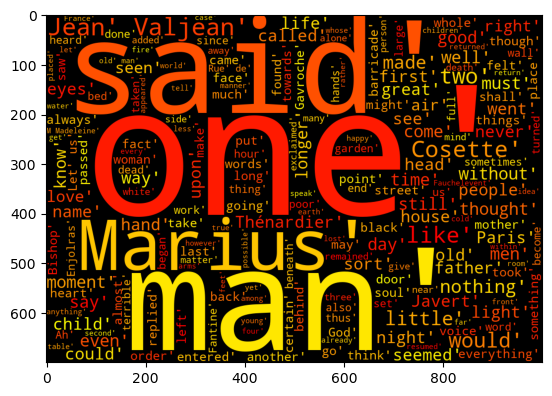

In [11]:
wordcloud = WordCloud(width=1000, height=700, background_color='black', colormap=plt.cm.autumn, min_font_size=10).generate(str(filtered_book))
plt.imshow(wordcloud)

In [24]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 

no_of_characters = len(character_list)

characters = [character for character in filtered_book if character in character_list]

character_map = {}
for i in range(no_of_characters):
    character_map[i] = character_list[i]
    

character_map



{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Cravatte',
 5: 'Valjean',
 6: 'Gervais',
 7: 'Fantine',
 8: 'Tholomyès',
 9: 'Blachevelle',
 10: 'Dahlia',
 11: 'Fameuil',
 12: 'Favourite',
 13: 'Listolier',
 14: 'Zéphine',
 15: 'Cosette',
 16: 'Thénardier',
 17: 'Éponine',
 18: 'Azelma',
 19: 'Javert',
 20: 'Fauchelevent',
 21: 'Bamatabois',
 22: 'Champmathieu',
 23: 'Brevet',
 24: 'Simplice',
 25: 'Chenildieu',
 26: 'Cochepaille',
 27: 'Innocente',
 28: 'Reverend',
 29: 'Ascension',
 30: 'Crucifixion',
 31: 'Gavroche',
 32: 'Magnon',
 33: 'Gillenormand',
 34: 'Marius',
 35: 'Colonel',
 36: 'Mabeuf',
 37: 'Enjolras',
 38: 'Combeferre',
 39: 'Prouvaire',
 40: 'Feuilly',
 41: 'Courfeyrac',
 42: 'Bahorel',
 43: 'Lesgle',
 44: 'Joly',
 45: 'Grantaire',
 46: 'Patron-Minette',
 47: 'Brujon',
 48: 'Toussaint'}

In [26]:
import pandas as pd

i=0

no_of_occurrences = pd.Series(range(no_of_characters))

for character in character_list:
    no_of_occurrences[i] = filtered_book.count(character)
    i = i + 1

no_of_occurrences

0       28
1      260
2       27
3       76
4        3
5     1096
6       25
7      200
8       60
9       27
10      19
11      11
12      42
13      11
14      16
15     987
16     520
17      80
18      21
19     443
20     284
21       4
22      46
23      23
24      28
25      14
26      14
27       2
28      10
29       3
30      13
31     300
32      28
33     230
34    1327
35      20
36      87
37     247
38      88
39      28
40      26
41     182
42      36
43       3
44      36
45      83
46       5
47      57
48      52
dtype: int64

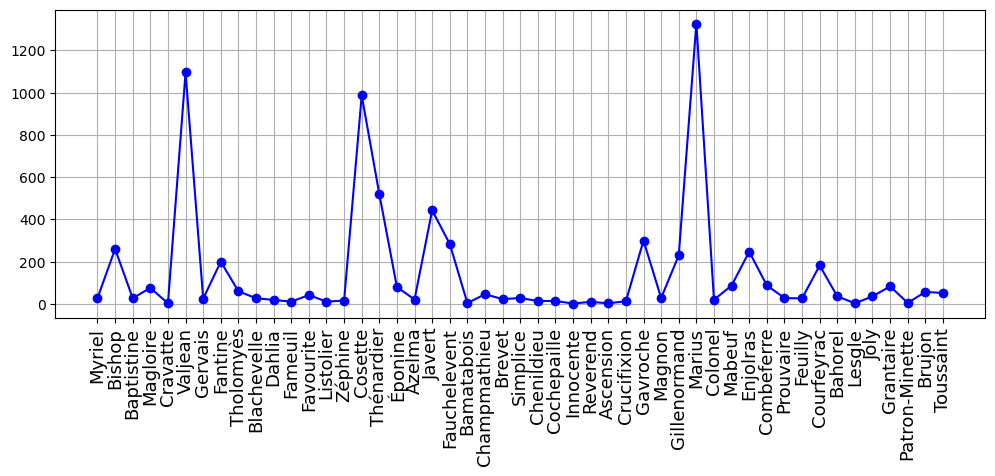

In [27]:
import numpy as np

fig = plt.figure(figsize=(12, 4))
ax= fig.add_subplot(111)
plt.plot(no_of_occurrences, 'b-o')
plt.xticks(np.arange(0, no_of_characters), character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)

In [32]:
character_positions = []

for i in range(len(no_of_occurrences)):
    a = np.zeros(no_of_occurrences[i])
    character_positions.append(a)

for j in range(no_of_characters):
    current_position = []
    for i in range(len(filtered_book)):
        if filtered_book[i] == character_list[j]:
            current_position.append(i)

character_positions[j][:]=current_position



TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

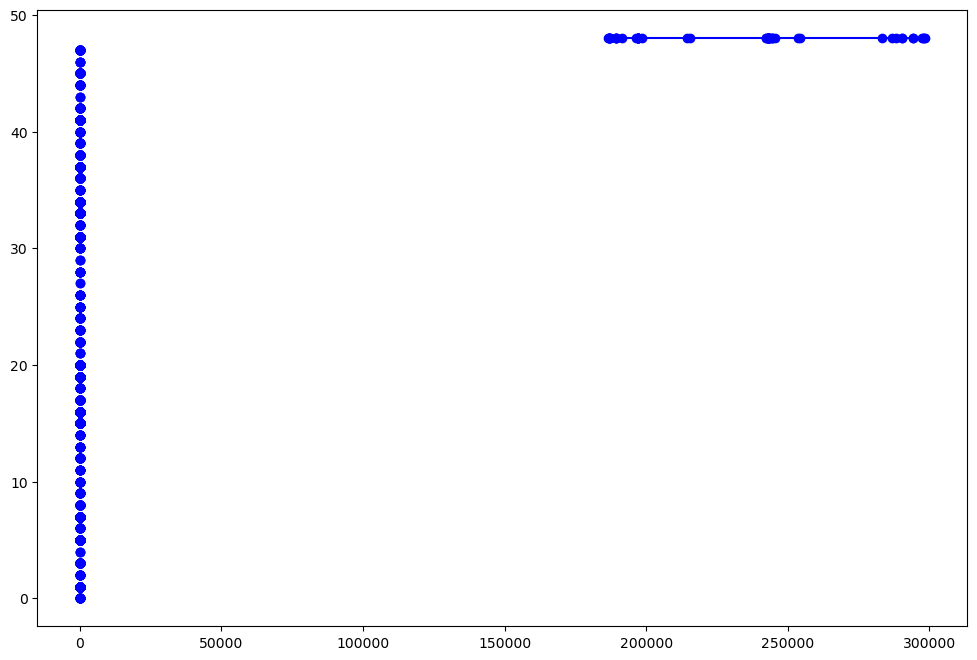

In [37]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

for j in range(0, no_of_characters):
    plt.plot(character_positions[j], j*np.ones(no_of_occurrences[j]), 'b-o')
    
plt.yticks(np.arange(0, no_of_characters, character_list))
plt.grid()

In [38]:
interactions_characters = np.zeros((no_of_characters,no_of_characters))
for i in range(no_of_characters-1):
    for j in range(i+1,no_of_characters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(no_of_occurrences[i]):
            for loc_j in range(no_of_occurrences[j]):
                # find distance
                dist = abs(character_positions[i][loc_i]-character_positions[j][loc_j])
                #if distance is small, then record interaction
                if (dist<500):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)

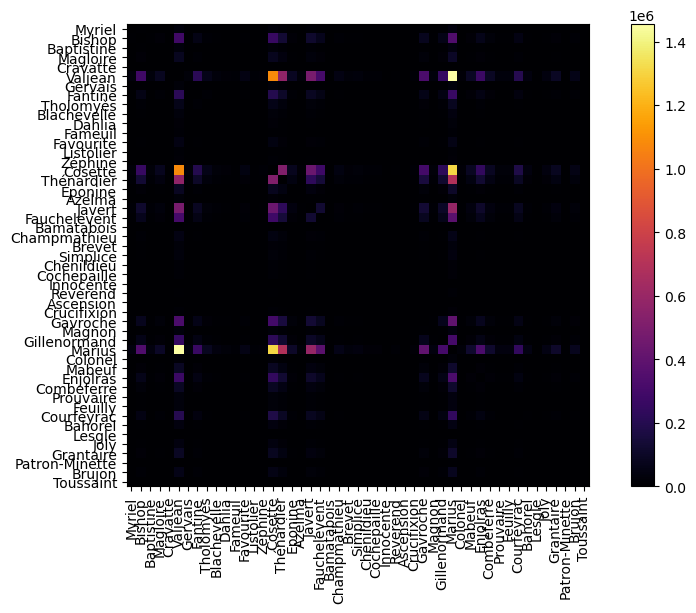

In [40]:
fig2 = plt.figure(figsize = (11, 6)) 
ax2    = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=plt.cm.inferno) 
plt.colorbar()
plt.yticks(np.arange(0,no_of_characters),character_list)
plt.xticks(np.arange(0,no_of_characters),character_list)
ax2.tick_params(axis='x', rotation=90, labelsize=10)